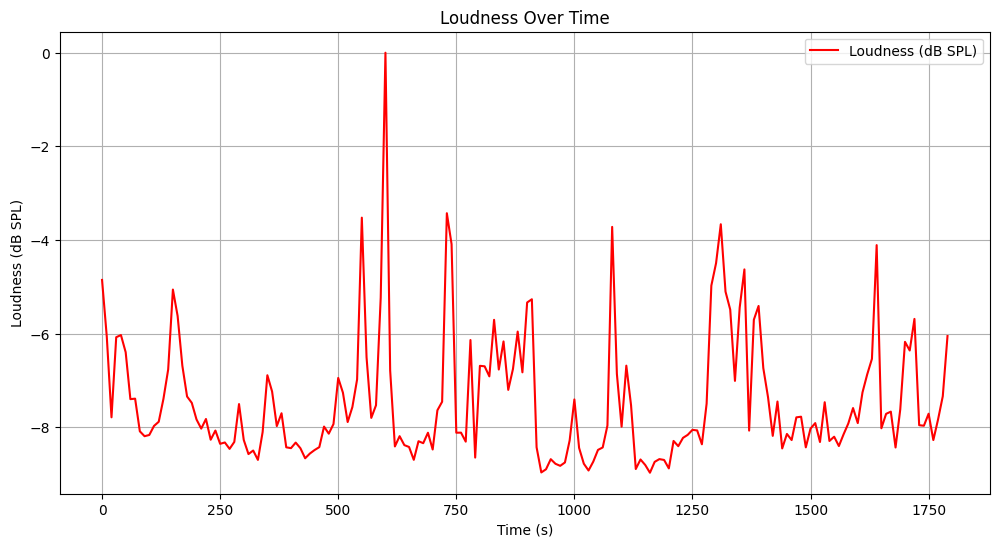

In [2]:
import os
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def extract_loudness(audio_path, sr=40000, clip_length=10):
    """
    Extracts RMS energy (loudness) from an audio file and converts it to dB SPL.
    The output is a time series of loudness per second.
    """
    # Load audio file
    wav, sr = librosa.load(audio_path, sr=sr)
    
    # Compute RMS energy for each time window
    frame_length = sr * clip_length  # Number of samples per 1-second clip
    rms_energy = [
        np.sqrt(np.mean(wav[i: i + frame_length] ** 2))
        for i in range(0, len(wav), frame_length)
    ]

    # Convert RMS to dB SPL (avoiding log(0) error)
    rms_db = librosa.amplitude_to_db(np.array(rms_energy), ref=np.max)

    # Generate timestamps based on clip length
    timestamps = np.arange(0, len(rms_db) * clip_length, clip_length)

    # Create DataFrame
    loudness_df = pd.DataFrame({"time": timestamps, "loudness_db": rms_db})
    
    return loudness_df

# ✅ Extract Loudness for a Test File
test_audio = os.getcwd().replace("/_scripts","/_data/Audio/Full/Detection_Test_Files_20250227/Digital_Globe/Ag Ditch - Y/S4A23845_20240501_120000.wav")  # Change to your test file name
loudness_df = extract_loudness(test_audio)

# ✅ Plot Loudness Over Time
plt.figure(figsize=(12, 6))
plt.plot(loudness_df["time"], loudness_df["loudness_db"], label="Loudness (dB SPL)", color="r")
plt.xlabel("Time (s)")
plt.ylabel("Loudness (dB SPL)")
plt.title("Loudness Over Time")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
import librosa
import librosa.display
import numpy as np
import pandas as pd
import os
import glob
import re
from datetime import datetime


# ✅ Define Constants
AUDIO_FOLDER = os.getcwd().replace("/_scripts", "/_data/Audio/Full/Starlink_Group_7-13")
SAMPLE_RATE = 40000
CLIP_LENGTH = 1  # Process in 1-second chunks
RESULTS_DIR = os.getcwd().replace("/_scripts", "/_results/Model/output")
OUTPUT_CSV = os.path.join(RESULTS_DIR,"loudness_data.csv")

def extract_loudness(audio_path, sr=SAMPLE_RATE, clip_length=CLIP_LENGTH):
    """
    Extracts RMS energy (loudness) from an audio file and converts it to dB SPL.
    Returns a DataFrame with time (seconds) and loudness (dB SPL).
    """
    try:
        # Load audio file
        wav, sr = librosa.load(audio_path, sr=sr)

        # Compute RMS energy for each time window
        frame_length = sr * clip_length  # Number of samples per 1-second clip
        rms_energy = [
            np.sqrt(np.mean(wav[i: i + frame_length] ** 2))
            for i in range(0, len(wav), frame_length)
        ]

        # Convert RMS to dB SPL (avoiding log(0) error)
        rms_db = librosa.amplitude_to_db(np.array(rms_energy), ref=np.max)

        # Generate timestamps based on clip length
        timestamps = np.arange(0, len(rms_db) * clip_length, clip_length)

        # Extract metadata from filename (recorder, date, time)
        base_name = os.path.basename(audio_path).replace(".wav", "")
        parts = base_name.split("_")  # Assuming filename format: "Recorder_YYYYMMDD_HHMMSS"
        if len(parts) >= 3:
            recorder, date, time = parts[0], parts[1], parts[2]
        else:
            recorder, date, time = base_name, "Unknown", "Unknown"

        # Create DataFrame
        loudness_df = pd.DataFrame({
            "audiofile": os.path.basename(audio_path),
            "recorder": recorder,
            "date": date,
            "time": time,
            "time_stamp": timestamps,
            "clip_no": np.arange(1, len(rms_db) + 1),
            "loudness_db": rms_db
        })
        
        return loudness_df

    except Exception as e:
        print(f"❌ Error processing {audio_path}: {e}")
        return None  # Return None if processing fails

# ✅ Process All Audio Files
all_loudness_data = []

# 🔹 Search for all .wav files in the directory (including subdirectories)
audio_files = glob.glob(os.path.join(AUDIO_FOLDER, "**/*.wav"), recursive=True)

# ✅ Function to extract date and time from filename
def extract_datetime(filename):
    match = re.search(r"_(\d{8})_(\d{6})", filename)  # Find YYYYMMDD_HHMMSS
    if match:
        date_part, time_part = match.groups()
        return datetime.strptime(f"{date_part} {time_part}", "%Y%m%d %H%M%S")
    return datetime.min  # Default to a very early date if no match

# ✅ Sort audio files by extracted datetime
audio_files = sorted(audio_files, key=lambda x: extract_datetime(os.path.basename(x)))

if not audio_files:
    print("❌ No audio files found!")

for audio_path in audio_files:
    print(f"🔹 Processing: {os.path.basename(audio_path)}")
    
    loudness_df = extract_loudness(audio_path)
    
    if loudness_df is not None:
        all_loudness_data.append(loudness_df)

# ✅ Combine all results into a single DataFrame
if all_loudness_data:
    final_df = pd.concat(all_loudness_data, ignore_index=True)

    # ✅ Save to CSV
    final_df.to_csv(OUTPUT_CSV, index=False)
    print(f"✅ Loudness data saved: {OUTPUT_CSV}")
else:
    print("❌ No valid loudness data to save!")


🔹 Processing: S4A14476_20240208_163504.wav
🔹 Processing: S4A14476_20240208_170506.wav
🔹 Processing: S4A14476_20240208_173504.wav
🔹 Processing: S4A14476_20240208_183504.wav
🔹 Processing: S4A14476_20240208_193504.wav
🔹 Processing: S4A14476_20240208_200506.wav
🔹 Processing: S4A14476_20240208_203504.wav
🔹 Processing: S4A14476_20240208_210504.wav
🔹 Processing: S4A14476_20240208_223506.wav
🔹 Processing: S4A14476_20240208_230504.wav
🔹 Processing: S4A14476_20240208_233504.wav
🔹 Processing: S4A14476_20240209_000504.wav
🔹 Processing: S4A14476_20240209_003504.wav
🔹 Processing: S4A14476_20240209_010504.wav
🔹 Processing: S4A14476_20240209_013504.wav
🔹 Processing: S4A14476_20240209_020504.wav
🔹 Processing: S4A14476_20240209_023505.wav
🔹 Processing: S4A14476_20240209_030505.wav
🔹 Processing: S4A14476_20240209_033505.wav
🔹 Processing: S4A14476_20240209_040507.wav
🔹 Processing: S4A14476_20240209_050505.wav
🔹 Processing: S4A14476_20240209_053505.wav
🔹 Processing: S4A14476_20240209_060506.wav
🔹 Processin

In [ ]:
import librosa
import numpy as np
import glob
import os

# ✅ Define folder containing audio files
AUDIO_FOLDER = os.getcwd().replace("/_scripts", "/_data/Audio/Full/Starlink_Group_7-13")
audio_files = glob.glob(os.path.join(AUDIO_FOLDER, "**/*.wav"), recursive=True)

# ✅ Function to extract date and time from filename
def extract_datetime(filename):
    match = re.search(r"_(\d{8})_(\d{6})", filename)  # Find YYYYMMDD_HHMMSS
    if match:
        date_part, time_part = match.groups()
        return datetime.strptime(f"{date_part} {time_part}", "%Y%m%d %H%M%S")
    return datetime.min  # Default to a very early date if no match

# ✅ Sort audio files by extracted datetime
audio_files = sorted(audio_files, key=lambda x: extract_datetime(os.path.basename(x)))

# ✅ Initialize empty waveform and sample rate
merged_audio = np.array([])
sr_global = None  # Global sample rate

# ✅ Merge all audio files
for file in audio_files:
    wav, sr = librosa.load(file, sr=None)  # Load without resampling
    if sr_global is None:
        sr_global = sr  # Set global sample rate from the first file
    elif sr != sr_global:
        wav = librosa.resample(wav, orig_sr=sr, target_sr=sr_global)  # Resample to match
    merged_audio = np.concatenate((merged_audio, wav))  # Append to merged audio

# ✅ Compute RMS Energy (Frame-based)
frame_length = int(sr_global * 1.0)  # 1-second window
hop_length = frame_length // 2  # 50% overlap
rms_energy = librosa.feature.rms(y=merged_audio, frame_length=frame_length, hop_length=hop_length)[0]

# ✅ Create timestamps for each frame
timestamps = librosa.frames_to_time(range(len(rms_energy)), sr=sr_global, hop_length=hop_length)

# ✅ Store results
rms_df = pd.DataFrame({"time": timestamps, "rms_energy": rms_energy})


In [ ]:
import math
# ✅ Initialize list to store results
results = []

# ✅ Process each audio file separately
for file in audio_files:
    wav, sr = librosa.load(file)  # Load without resampling
    
    num_clips = math.ceil(len(wav) / sr)
    clip_no = 1  # ✅ Reset clip number for each new file

    # ✅ Store results with correct clip numbers
    for i in range(0,num_clips):
        results.append({"audiofile": os.path.basename(file), "clip_no": clip_no})
        clip_no += 1  # Increment clip number




In [28]:
# ✅ Initialize empty waveform and sample rate
merged_audio = np.array([])
sr_global = 40000  # Global sample rate

# ✅ Merge all audio files
for file in audio_files:
    wav, sr = librosa.load(file, sr=None)  # Load without resampling
    if sr_global is None:
        sr_global = sr  # Set global sample rate from the first file
    elif sr != sr_global:
        wav = librosa.resample(wav, orig_sr=sr, target_sr=sr_global)  # Resample to match
    merged_audio = np.concatenate((merged_audio, wav))  # Append to merged audio

# ✅ Compute RMS Energy (Frame-based)
frame_length = int(sr_global * 1.0)  # 1-second window
hop_length = frame_length
rms_energy = librosa.feature.rms(y=merged_audio, frame_length=frame_length, hop_length=hop_length)[0]

# ✅ Convert results to DataFrame
rms_df = pd.DataFrame(results)
rms_df['energy'] = rms_energy

In [30]:
# ✅ Save to CSV
rms_df.to_csv(OUTPUT_CSV, index=False)